<a href="https://colab.research.google.com/github/annapurna-tumu6080/EDA_Netflix_Data_Analysis_project_/blob/main/EDA_netflix_project_Annapurna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Netflix Movies& TV Shows EDA**




Importing libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1.LOAD DATASET

In [19]:
from google.colab import files
uploaded = files.upload()

Saving netflix_dataset_for_user.csv to netflix_dataset_for_user (1).csv


In [20]:
df = pd.read_csv("netflix_dataset_for_user.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s00001,Movie,Title 1,Director D,"Actor 3, Actor 4",United States,"January 10, 2020",1996,PG-13,70 min,Horror,A dark story about technology.
1,s00002,TV Show,Title 2,Director E,NaN,United Kingdom,"October 19, 2010",2005,PG-13,3 Seasons,Thriller,A dark story about friendship.
2,s00003,TV Show,Title 3,Director A,"Actor 1, Actor 2",United Kingdom,"June 27, 2016",2015,R,2 Seasons,Documentary,A inspiring story about survival.
3,s00004,Movie,Title 4,Director B,NaN,"Japan, Italy","October 07, 2009",1980,TV-14,136 min,Thriller,A thrilling story about technology.
4,s00005,Movie,Title 5,Director D,NaN,Canada,"May 19, 2020",1987,TV-MA,68 min,Family,A mysterious story about friendship.


UNDERSTAND THE DATA

In [21]:
#number of rows
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       300 non-null    object
 1   type          300 non-null    object
 2   title         300 non-null    object
 3   director      224 non-null    object
 4   cast          238 non-null    object
 5   country       255 non-null    object
 6   date_added    299 non-null    object
 7   release_year  300 non-null    int64 
 8   rating        300 non-null    object
 9   duration      300 non-null    object
 10  listed_in     300 non-null    object
 11  description   300 non-null    object
dtypes: int64(1), object(11)
memory usage: 28.3+ KB


In [22]:
#number of columns
df.describe()


,release_year
count,300.000000
mean,2002.086667
std,13.316541
min,1980.000000
25%,1990.000000
50%,2003.000000
75%,2015.000000
max,2024.000000


In [23]:
#columns with missing values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,76
cast,62
country,45
date_added,1
release_year,0
rating,0
duration,0


In [24]:
#Dulicate rows
df.duplicated().sum()

np.int64(0)

DATA CLEANING

1.#Handling missing values

In [25]:
df['country'] = df['country'].fillna("Unknown")

In [26]:
df['director'] = df['director'].fillna("Unknown")

In [27]:
df['cast'] = df['cast'].fillna("Unknown")

2.Remove duplicates rows

In [28]:
df = df.drop_duplicates()


3.Handle date Column

In [29]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')



In [30]:
df['year_added'] = df['date_added'].dt.year

4. Clean Duration Column

In [31]:
def convert_duration(x):
    if 'min' in x:
        return int(x.split()[0])
    else:
        return int(x.split()[0])

df['duration_num'] = df['duration'].apply(convert_duration)


Feature Engineering

1.Extract primary Genre

In [32]:
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(",")[0])


2.Count Number of genres

In [33]:
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(",")))


Univariate Analysis

1. Movie vs TV Show Count

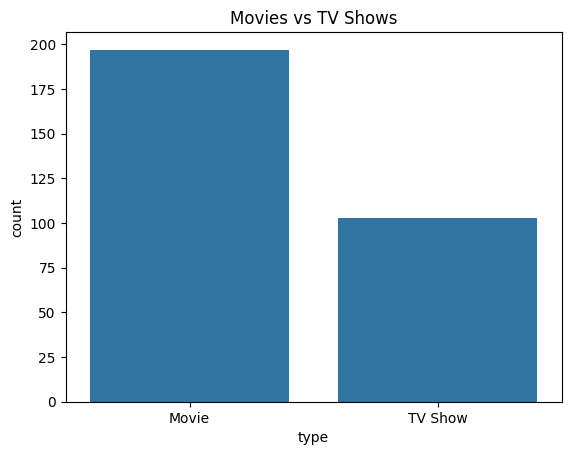

In [34]:
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")
plt.show()


2. Ratings Distribution

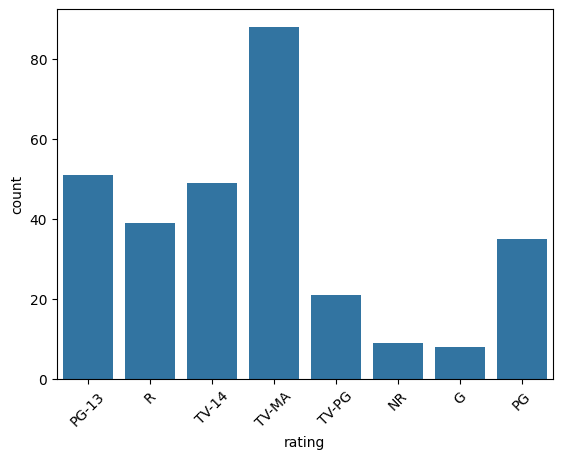

In [35]:
sns.countplot(data=df, x='rating')
plt.xticks(rotation=45)
plt.show()


Bivariate Analysis



3. Content Added Over the Years

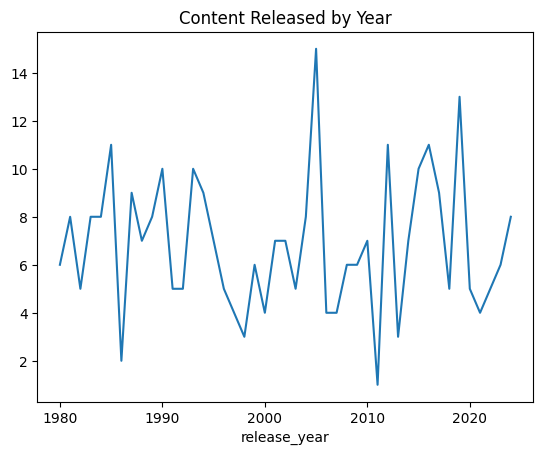

In [36]:
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Content Released by Year")
plt.show()


4. Top 10 Primary Genres

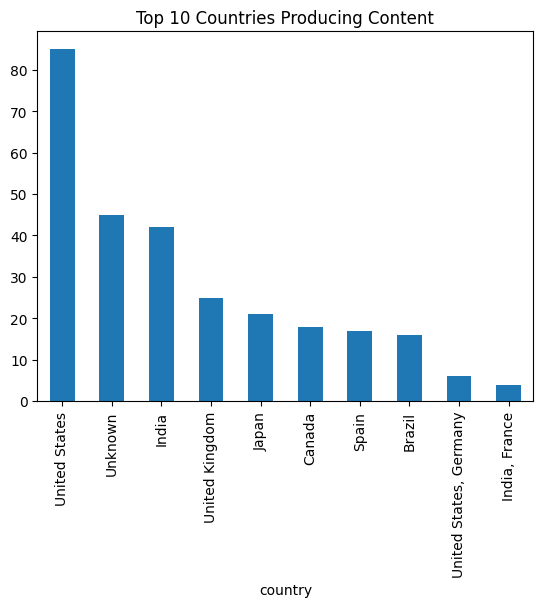

In [37]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries Producing Content")
plt.show()


5. Countries with Most Titles

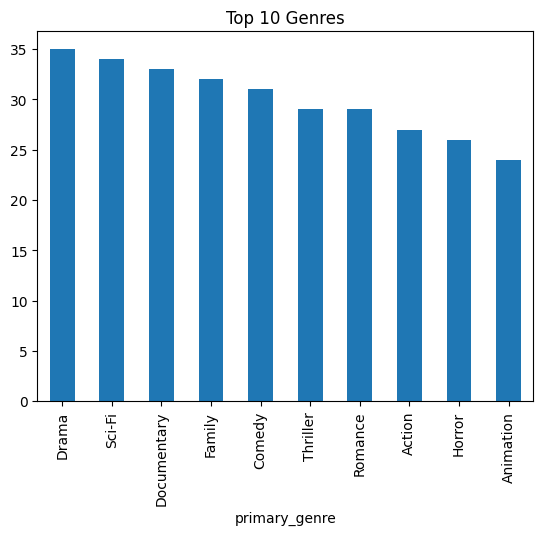

In [38]:
df['primary_genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.show()
